In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load
from datetime import datetime

In [3]:
# b) Load dataset
startTimeScript = datetime.now()

In [4]:
inputFile = r'E:\Data science & Machine Learning\Project\Customer_Campaign.csv'
df= read_csv(inputFile, na_values="na")

In [5]:
inputFile = 'E:\Data science & Machine Learning\Project\Customer_Campaign.csv'
testdf = read_csv(inputFile, na_values="na")

In [6]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

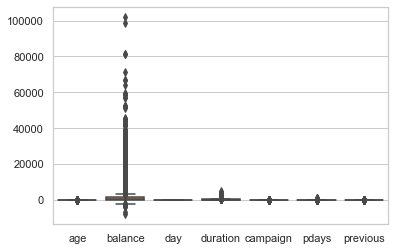

In [8]:
sns.set(style="whitegrid")
sns.boxplot(data=df)

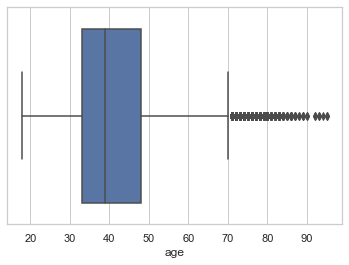

In [9]:
sns.boxplot(df['age'])

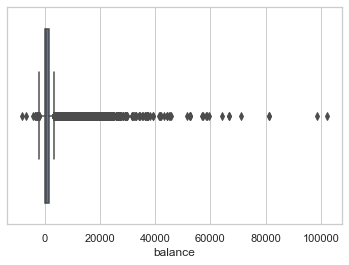

In [10]:
sns.boxplot(df['balance'])

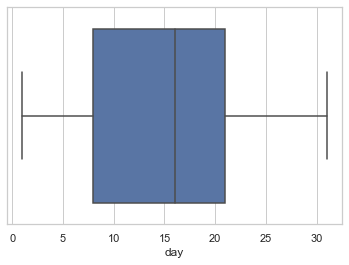

In [11]:
sns.boxplot(df['day'])

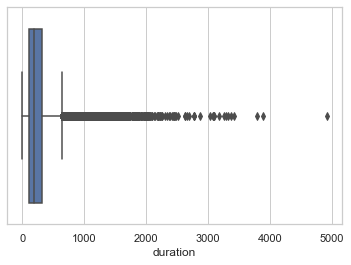

In [12]:
sns.boxplot(df['duration'])

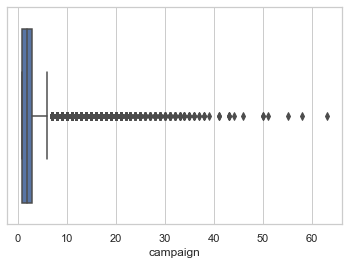

In [13]:
sns.boxplot(df['campaign'])

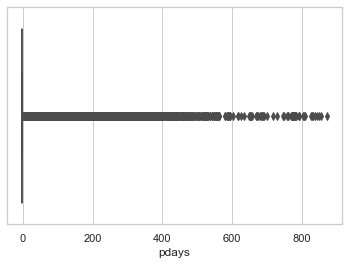

In [14]:
sns.boxplot(df['pdays'])

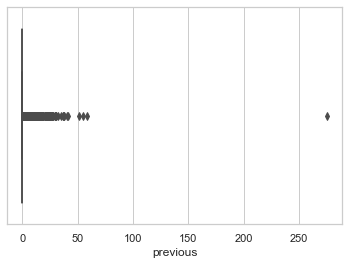

In [15]:
sns.boxplot(df['previous'])

In [16]:
q1,q3=np.percentile(df['age'],[25,75])
IQR=q3-q1
LTV=q1-1.5*IQR
UTV=q3+1.5*IQR
q1,q3,LTV,UTV
df['age']=df['age'].mask(df['age']>UTV,UTV)
#df['age']=df['age'].mask(df['age']<LTV,LTV)

In [17]:
q1,q3=np.percentile(df['balance'],[25,75])
IQR=q3-q1
LTV=q1-1.5*IQR
UTV=q3+1.5*IQR
q1,q3,LTV,UTV
df['balance']=df['balance'].mask(df['balance']>UTV,UTV)
df['balance']=df['balance'].mask(df['balance']<LTV,LTV)

In [53]:
q1,q3=np.percentile(df['campaign'],[25,75])
IQR=q3-q1
LTV=q1-1.5*IQR
UTV=q3+1.5*IQR
q1,q3,LTV,UTV
df['campaign']=df['campaign'].mask(df['campaign']>UTV,UTV)
df['campaign']=df['campaign'].mask(df['campaign']<LTV,LTV)

In [19]:
q1,q3=np.percentile(df['duration'],[25,75])
IQR=q3-q1
LTV=q1-1.5*IQR
UTV=q3+1.5*IQR
q1,q3,LTV,UTV
df['duration']=df['duration'].mask(df['duration']>UTV,UTV)

In [20]:
q1,q3=np.percentile(df['pdays'],[25,75])
IQR=q3-q1
LTV=q1-1.5*IQR
UTV=q3+1.5*IQR
q1,q3,LTV,UTV
df['pdays']=df['pdays'].mask(df['pdays']>UTV,UTV)
#df['pdays']=df['pdays'].mask(df['pdays']<LTV,LTV)

In [21]:
q1,q3=np.percentile(df['previous'],[25,75])
IQR=q3-q1
LTV=q1-1.5*IQR
UTV=q3+1.5*IQR
q1,q3,LTV,UTV
df['previous']=df['previous'].mask(df['previous']>UTV,UTV)#(Right side outliers)
#df['previous']=df['previous'].mask(df['previous']<LTV,LTV)(left side outliers)

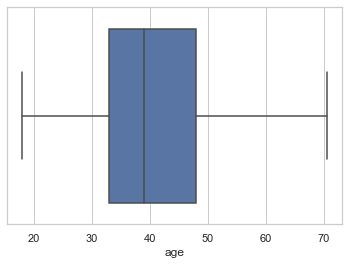

In [22]:
sns.boxplot(df['age'])

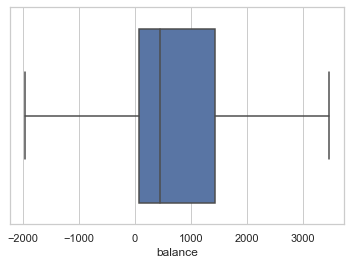

In [23]:
sns.boxplot(df['balance'])

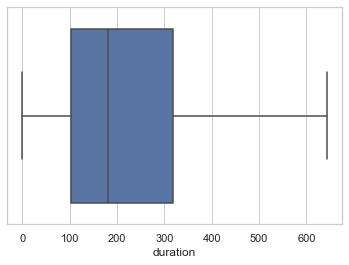

In [24]:
sns.boxplot(df['duration'])

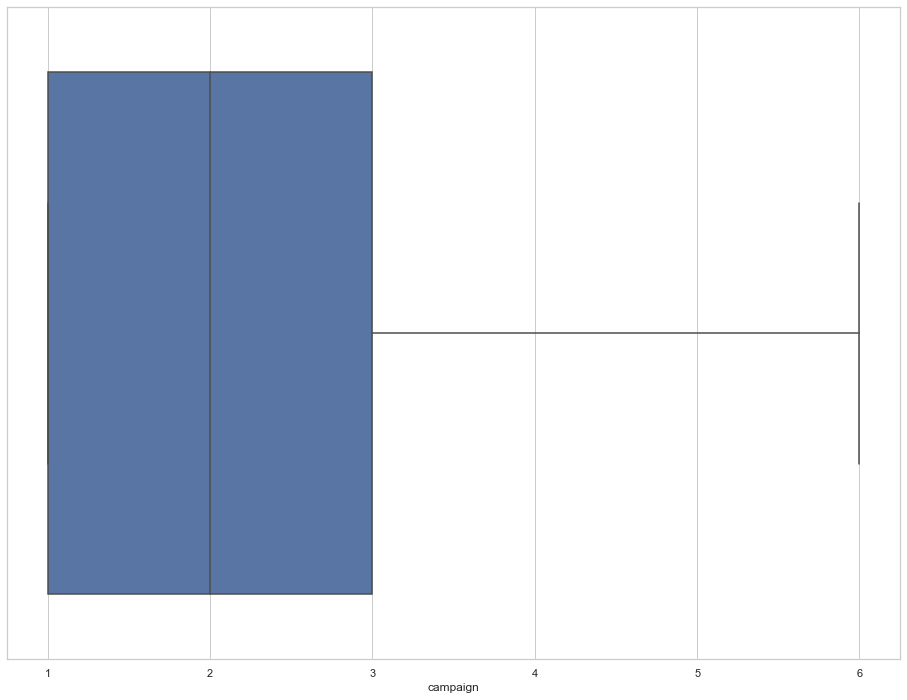

In [54]:
sns.boxplot(df['campaign'])

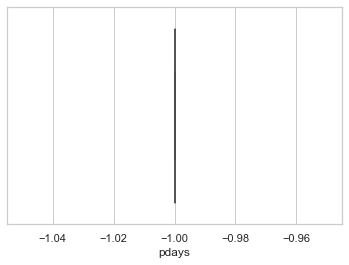

In [26]:
sns.boxplot(df['pdays'])

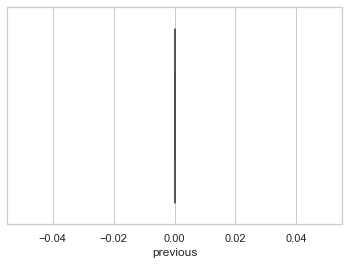

In [27]:
sns.boxplot(df['previous'])

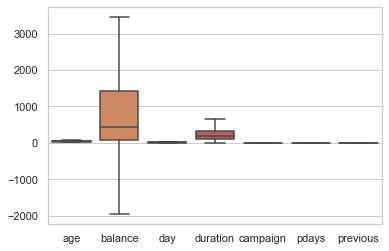

In [28]:
sns.set(style="whitegrid")
sns.boxplot(data=df)

In [29]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [30]:
print(df.dtypes)

age          float64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object


In [31]:

# Summarize Data
# Set up a variable for the total number of attribute columns (totAttr)
totCol = len(df.columns)
totAttr = totCol-1
dispCol = 3
if totAttr % dispCol == 0 :
    dispRow = totAttr // dispCol
else :
    dispRow = (totAttr // dispCol) + 1


In [45]:
# ## Density plot for each attribute
# df.plot(kind='density', subplots=True, layout=(dispRow,5), sharex=False)

# pyplot.show()

In [33]:
# 2.a.iv) Statistical summary of all attributes
Statitical_summary = df.describe()

In [34]:
# 2.a.iv) Statistical summary of all attributes
Statitical_summary 

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.0,45211.0
mean,40.868185,933.706974,15.806419,234.939307,2.392228,-1.0,0.0
std,10.394895,1176.765369,8.322476,176.749932,1.600111,0.0,0.0
min,18.000000,-1962.000000,1.000000,0.000000,1.000000,-1.0,0.0
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.0,0.0
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.0,0.0
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.0,0.0
max,70.500000,3462.000000,31.000000,643.000000,6.000000,-1.0,0.0


In [35]:
# b) Data visualizations
# Set figure width to 5 and height to 5 (5:5 aspect ratio)
fig_size = pyplot.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
pyplot.rcParams["figure.figsize"] = fig_size


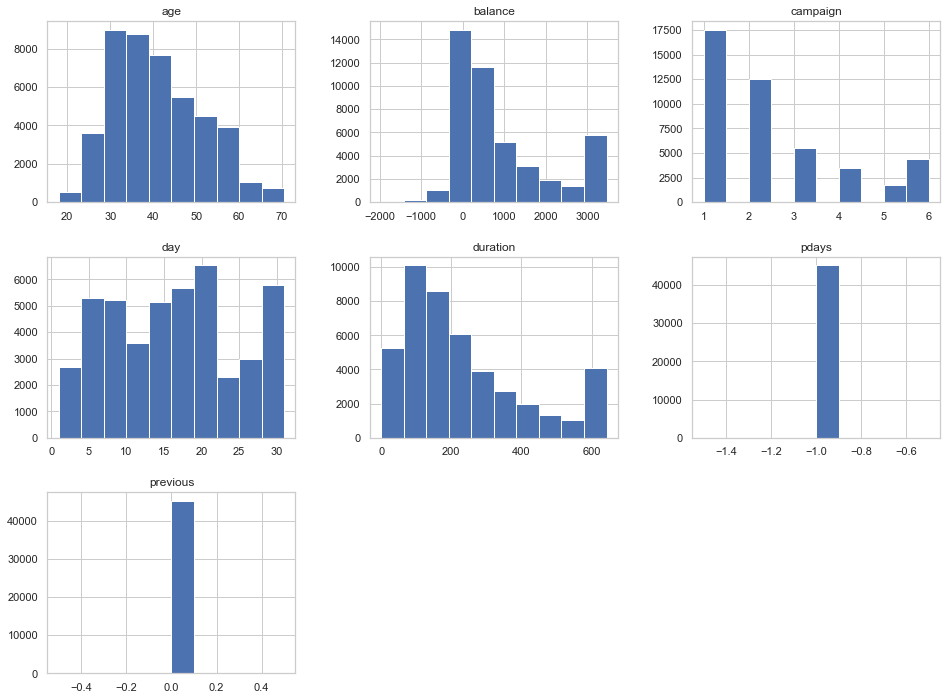

In [36]:
# Histograms for each attribute
df.hist()
pyplot.show()

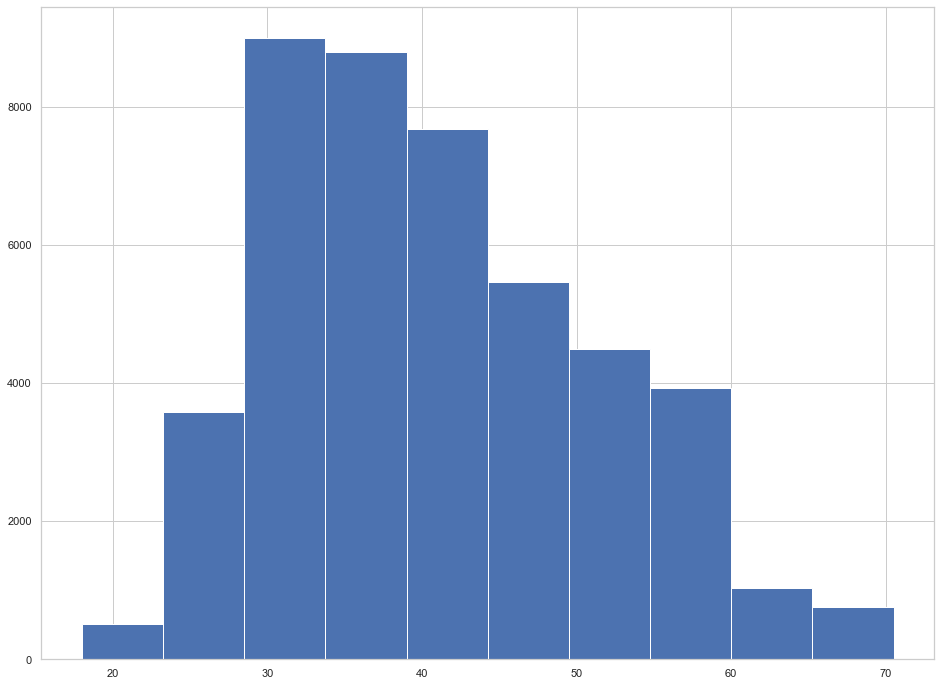

In [46]:
df.age.hist()

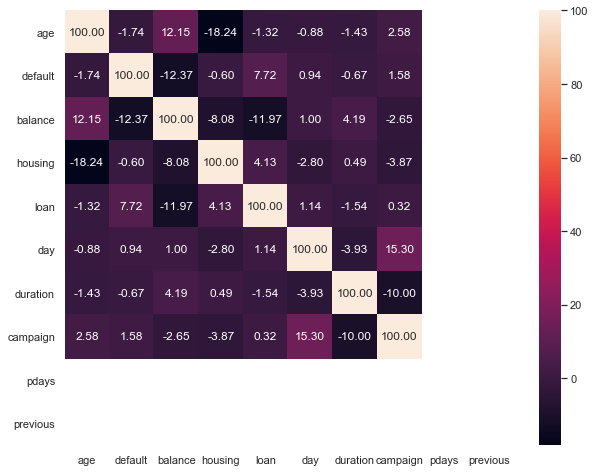

In [55]:
## Correlation matrix
# Calculate correlations
from matplotlib import pyplot as plt
corr = df.corr()
plt.figure(figsize=(10,8))
corr = corr*100
# Heatmap
sns.heatmap(corr, annot=True, fmt=".2f")

In [38]:
df['default'].replace('no',0,inplace=True)
df['default'].replace('yes',1,inplace=True)
df['housing'].replace('no',0,inplace=True)
df['housing'].replace('yes',1,inplace=True)

df['loan'].replace('yes',1,inplace=True)
df['loan'].replace('no',0,inplace=True)

In [39]:
df.head(9)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no
1,44.0,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no
4,33.0,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,no
5,35.0,management,married,tertiary,0,231,1,0,unknown,5,may,139,1,-1,0,unknown,no
6,28.0,management,single,tertiary,0,447,1,1,unknown,5,may,217,1,-1,0,unknown,no
7,42.0,entrepreneur,divorced,tertiary,1,2,1,0,unknown,5,may,380,1,-1,0,unknown,no
8,58.0,retired,married,primary,0,121,1,0,unknown,5,may,50,1,-1,0,unknown,no


In [40]:
# 4. Evaluate Algorithms
# a) Split-out validation dataset
# 3.d) Split-out training and validation datasets
# We create a training dataset (variable name "training") and a validation dataset (variable name "validation")

seedNum = 777
# totCol = len(entireDataset.columns)
# array = entireDataset.values
X_train = df.iloc[:, [0,4,5,6,7,9,11,12,13,14]]
Y_train = df.iloc[:,16]
totCol = len(testdf.columns)
array = df.values
X_test = testdf.iloc[:, [0,4,5,6,7,9,11,12,13,14]]
Y_test = testdf.iloc[:,16]

print("X_train.shape: {} Y_train.shape: {}".format(X_train.shape, Y_train.shape))
print("X_test.shape: {} Y_test.shape: {}".format(X_test.shape, Y_test.shape))
print ('Total time for data handling and visualization:',(datetime.now() - startTimeScript))


X_train.shape: (45211, 10) Y_train.shape: (45211,)
X_test.shape: (45211, 10) Y_test.shape: (45211,)
Total time for data handling and visualization: 0:04:33.074964


In [41]:
from sklearn.linear_model import SGDClassifier

In [42]:
# 4.a) Set test options and evaluation metric
# b) Test options and evaluation metric
# Run algorithms using 10-fold cross validation
num_folds = 10
scoring = 'accuracy'

# Set up Algorithms Spot-Checking Array
models = []
models.append(('LR', LogisticRegression(random_state=seedNum)))
models.append(('CART', DecisionTreeClassifier(random_state=seedNum)))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
# models.append(('SVM', SVC(random_state=seedNum)))
# models.append(('BT', BaggingClassifier(random_state=seedNum)))
models.append(('RF', RandomForestClassifier(random_state=seedNum)))
# models.append(('ET', ExtraTreesClassifier(random_state=seedNum)))
models.append(('AB', AdaBoostClassifier(random_state=seedNum)))
models.append(('SGD', SGDClassifier(random_state=seedNum)))
results = []
names = []
metrics = []

In [43]:
# Generate model in turn
for name, model in models:
    startTimeModule = datetime.now()
    kfold = KFold(n_splits=num_folds, random_state=seedNum)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    metrics.append(cv_results.mean())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print ('Model training time:',(datetime.now() - startTimeModule))
print ('Average metrics ('+scoring+') from all models:',np.mean(metrics))

LR: 0.881686 (0.115087)
Model training time: 0:00:06.067777
CART: 0.815198 (0.090757)
Model training time: 0:00:03.743114
NB: 0.865894 (0.100444)
Model training time: 0:00:01.133908
KNN: 0.872154 (0.112740)
Model training time: 0:00:05.577653
RF: 0.869698 (0.112276)
Model training time: 0:00:09.164043
AB: 0.883633 (0.110163)
Model training time: 0:01:05.964462
SGD: 0.804713 (0.140679)
Model training time: 0:00:15.470313
Average metrics (accuracy) from all models: 0.8561393663042699


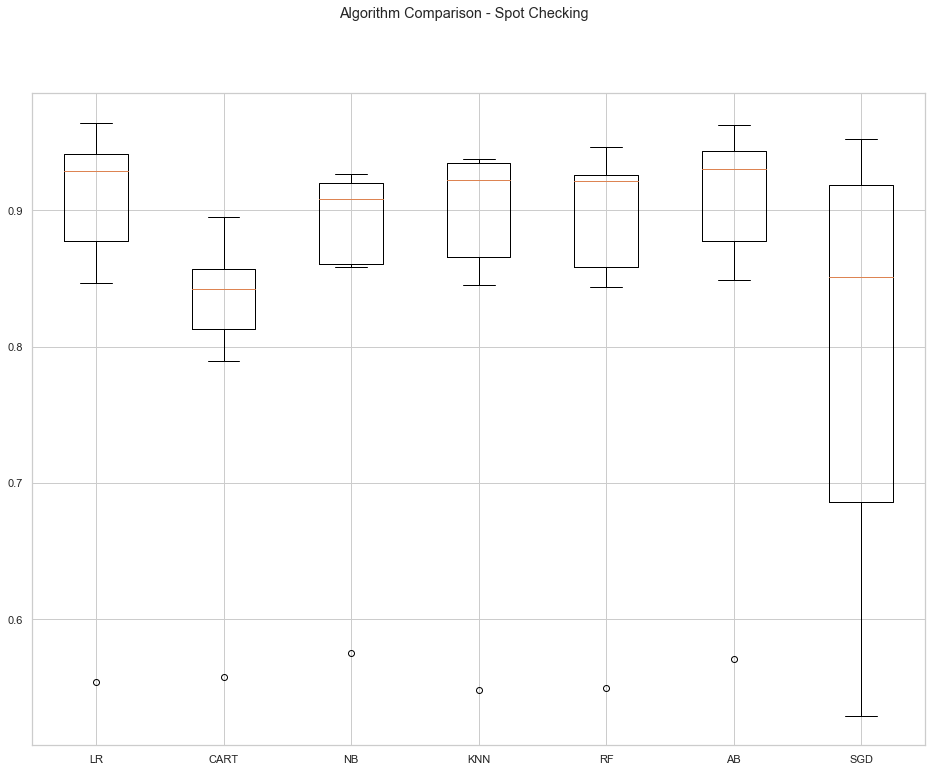

In [44]:
# c) Spot Check Algorithms

fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - Spot Checking')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()